<a href="https://colab.research.google.com/github/mae001/Machine-Learning-projects/blob/main/Introduction_to_compter_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("/content/pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-07-22 16:44:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.1MB/s    in 5.7s    

2024-07-22 16:44:39 (18.4 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
import os

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 0 directories and 250 images in pizza_steak/test/steak.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/pizza.
There are 0 directories and 750 images in pizza_steak/train/steak.


In [ ]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
data_dir

PosixPath('pizza_steak/train')

In [ ]:
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")

for item in data_dir.glob("*"):
  print(item," ", item.name)

pizza_steak/train/pizza   pizza
pizza_steak/train/steak   steak


In [ ]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + '/'+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

Image shape: (512, 512, 3)


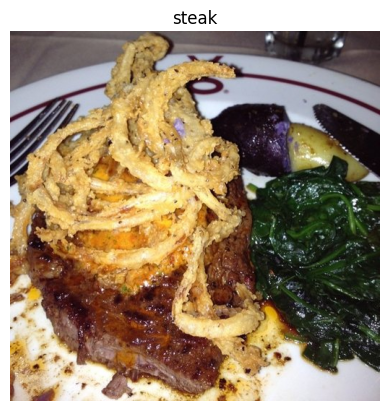

In [ ]:
img = view_random_image(target_dir = 'pizza_steak/train/',
                        target_class = "steak")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "/content/pizza_steak/train"
test_dir ="/content/pizza_steak/test"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode="binary",
                                               seed = 42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           kernel_initializer = "he_normal",
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation = "relu",kernel_initializer = "he_normal"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                       padding = "valid"),
    tf.keras.layers.Conv2D(10,3,activation = "relu",kernel_initializer = "he_normal"),
    tf.keras.layers.Conv2D(10,3,activation = "relu",kernel_initializer = "he_normal"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = "linear")

])
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), optimizer = "adam",
              metrics = ["accuracy"])
model_1.fit(train_data,
            epochs = 5,
            validation_data = valid_data)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 170ms/step - loss: 0.6440 - accuracy: 0.6327 - val_loss: 0.4402 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 7s 151ms/step - loss: 0.4390 - accuracy: 0.8033 - val_loss: 0.4040 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 6s 138ms/step - loss: 0.3580 - accuracy: 0.8453 - val_loss: 0.3755 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 7s 149ms/step - loss: 0.2674 - accuracy: 0.8880 - val_loss: 0.4162 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 9s 202ms/step - loss: 0.1730 - accuracy: 0.9293 - val_loss: 0.4028 - val_accuracy: 0.7940


In [ ]:
model_dense = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(100,activation = "relu",kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(100,activation = "relu",kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(100,activation = "relu",kernel_initializer = "he_normal"),
    tf.keras.layers.Dense(1,activation = "linear")
])
model_dense.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), optimizer = "adam",
              metrics = ["accuracy"])
history = model_dense.fit(train_data,
            epochs = 5,
            validation_data = valid_data)

Epoch 1/5
47/47 [==============================] - 13s 216ms/step - loss: 7.4019 - accuracy: 0.6240 - val_loss: 4.7978 - val_accuracy: 0.5560
Epoch 2/5
47/47 [==============================] - 6s 123ms/step - loss: 2.6708 - accuracy: 0.6700 - val_loss: 1.5506 - val_accuracy: 0.6860
Epoch 3/5
47/47 [==============================] - 7s 143ms/step - loss: 1.2067 - accuracy: 0.7113 - val_loss: 0.9993 - val_accuracy: 0.7120
Epoch 4/5
47/47 [==============================] - 5s 106ms/step - loss: 1.1371 - accuracy: 0.7100 - val_loss: 2.3705 - val_accuracy: 0.6160
Epoch 5/5
47/47 [==============================] - 6s 126ms/step - loss: 0.9062 - accuracy: 0.7560 - val_loss: 1.4696 - val_accuracy: 0.6280


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [ ]:
model_dense.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               batch_size = 32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
train_data.next()

(array([[[[0.1137255 , 0.11764707, 0.18823531],
          [0.1137255 , 0.11764707, 0.18823531],
          [0.10980393, 0.1137255 , 0.18431373],
          ...,
          [0.9607844 , 0.9450981 , 0.9490197 ],
          [0.8313726 , 0.81568635, 0.8196079 ],
          [0.9843138 , 0.9686275 , 0.9725491 ]],
 
         [[0.12156864, 0.1254902 , 0.19607845],
          [0.1254902 , 0.12941177, 0.20000002],
          [0.10196079, 0.10588236, 0.1764706 ],
          ...,
          [0.9333334 , 0.92549026, 0.9294118 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [0.9960785 , 0.98823535, 0.9921569 ]],
 
         [[0.09803922, 0.10196079, 0.17254902],
          [0.10588236, 0.10980393, 0.18039216],
          [0.1254902 , 0.13333334, 0.19215688],
          ...,
          [0.8000001 , 0.79215693, 0.7960785 ],
          [0.909804  , 0.90196085, 0.9058824 ],
          [1.        , 0.9960785 , 1.        ]],
 
         ...,
 
         [[0.09803922, 0.07843138, 0.09411766],
          [0.07843

In [ ]:
images,labels = train_data.next()

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = "valid",
           activation = "relu",
           input_shape = (224,224,3)),

    Conv2D(10,3,activation = "relu"),
    Conv2D(10,3,activation = "relu"),
    Flatten(),
    Dense(1,activation = "sigmoid")
])

In [ ]:
model_4.compile(
    loss = "binary_crossentropy",
    optimizer = Adam(),
    metrics = ["accuracy"]

)

In [ ]:
len(train_data),len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 152ms/step - loss: 0.7292 - accuracy: 0.7040 - val_loss: 0.4556 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 7s 141ms/step - loss: 0.4433 - accuracy: 0.7953 - val_loss: 0.4756 - val_accuracy: 0.7680
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3015 - accuracy: 0.8873 - val_loss: 0.3545 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 8s 163ms/step - loss: 0.2037 - accuracy: 0.9293 - val_loss: 0.4122 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 7s 140ms/step - loss: 0.1089 - accuracy: 0.9693 - val_loss: 0.4795 - val_accuracy: 0.7940


In [ ]:
labels[0]

1.0

In [ ]:
model_4.evaluate(test_data)


16/16 [==============================] - 2s 108ms/step - loss: 0.4795 - accuracy: 0.7940


[0.47954028844833374, 0.7940000295639038]

In [ ]:
history_4

<Axes: >

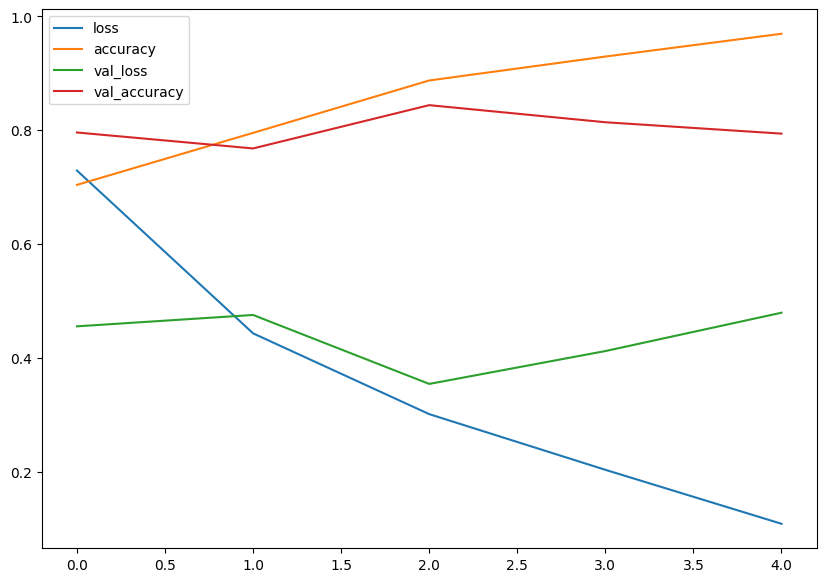

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10,7))

In [ ]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  plt.plot(epochs,loss,label = "training_loss")
  plt.plot(epochs,val_loss,label = "val_loss")

  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs , accuracy, label = "training_accuracy")
  plt.plot(epochs , val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

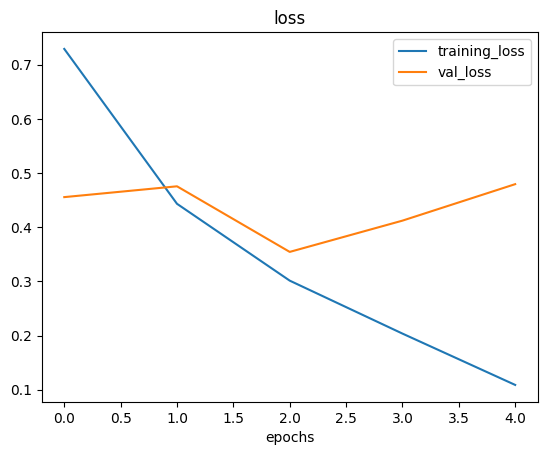

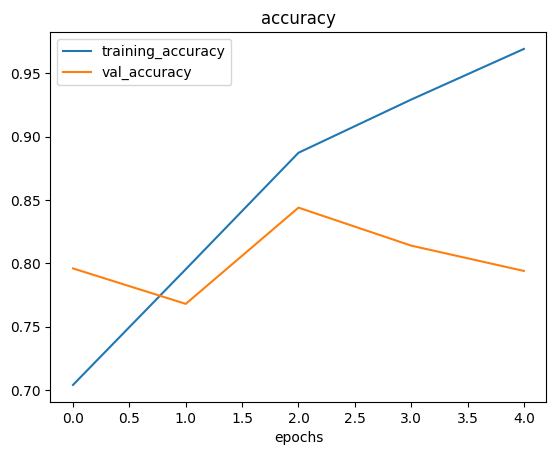

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_5 = Sequential([
    Conv2D(10,3,activation = "relu",input_shape = (224,224,3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Conv2D(10,3,activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation = "sigmoid")

])

In [ ]:
model_5.compile(loss = "binary_crossentropy",
                metrics = ["accuracy"],
                optimizer = Adam())

In [ ]:
history_5 = model_5.fit(train_data,
            steps_per_epoch = len(train_data),
            epochs = 5,
            validation_data = test_data,
            validation_steps = len(test_data)
            )

Epoch 1/5
47/47 [==============================] - 9s 149ms/step - loss: 0.6662 - accuracy: 0.5767 - val_loss: 0.5901 - val_accuracy: 0.6900
Epoch 2/5
47/47 [==============================] - 7s 146ms/step - loss: 0.5178 - accuracy: 0.7473 - val_loss: 0.3947 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 9s 200ms/step - loss: 0.4207 - accuracy: 0.8153 - val_loss: 0.3761 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 5s 108ms/step - loss: 0.3883 - accuracy: 0.8273 - val_loss: 0.3352 - val_accuracy: 0.8840
Epoch 5/5
47/47 [==============================] - 5s 109ms/step - loss: 0.3946 - accuracy: 0.8333 - val_loss: 0.3564 - val_accuracy: 0.8340


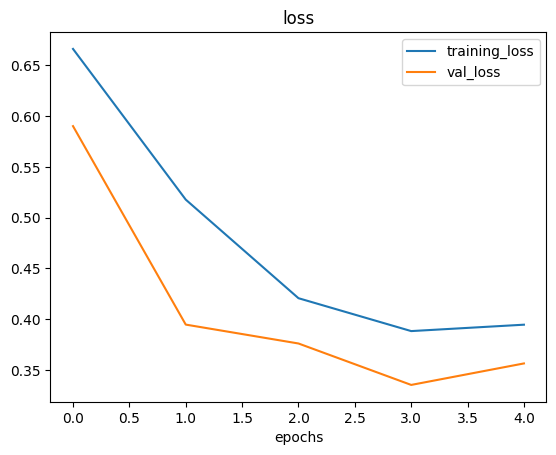

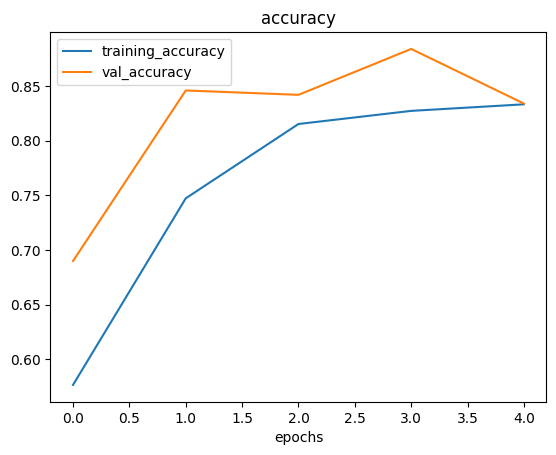

In [ ]:
plot_loss_curves(history_5)

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255. ,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
print("train data augmented: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                   target_size = (224,224),
                                                                   class_mode = "binary",
                                                                   batch_size = 32,
                                                                   shuffle = False)
print("train data Non-augmented: ")
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                              target_size = (224,224),
                                              class_mode = "binary",
                                              batch_size = 32,
                                              shuffle = False)
IMG_SIZE = (224,224)

print("non-augmented test data:")
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                              target_size = (224,224),
                                              class_mode = "binary",
                                              batch_size = 32,


)

train data augmented: 
Found 1500 images belonging to 2 classes.
train data Non-augmented: 
Found 1500 images belonging to 2 classes.
non-augmented test data:
Found 500 images belonging to 2 classes.


In [ ]:
images,labels = train_data.next()

augmented_images, augmented_labes = train_data_augmented.next()

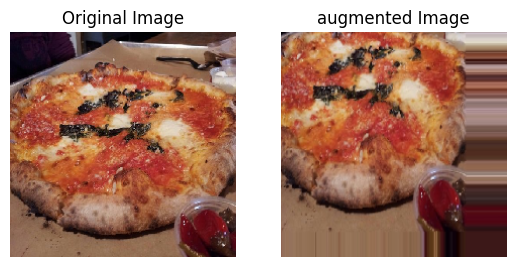

In [ ]:
import random
random_number = random.randint(1,31)
plt.subplot(1,2,1)
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(augmented_images[random_number])
plt.title("augmented Image")
plt.axis("off")
plt.show()

In [ ]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           ),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           ),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    Dense(1,activation = "sigmoid")

])



In [ ]:
model_6.compile(loss = "binary_crossentropy",
                optimizer = Adam(),
                metrics = ["accuracy"])

In [ ]:
history_6 = model_6.fit(train_data_augmented,
                      epochs = 5,
                      steps_per_epoch = len(train_data_augmented),
                      validation_data = test_data,
                      validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 414ms/step - loss: 0.7239 - accuracy: 0.4180 - val_loss: 0.6892 - val_accuracy: 0.5060
Epoch 2/5
47/47 [==============================] - 22s 473ms/step - loss: 0.6942 - accuracy: 0.5087 - val_loss: 0.6871 - val_accuracy: 0.5420
Epoch 3/5
47/47 [==============================] - 21s 443ms/step - loss: 0.6985 - accuracy: 0.4827 - val_loss: 0.6896 - val_accuracy: 0.5440
Epoch 4/5
47/47 [==============================] - 21s 438ms/step - loss: 0.6929 - accuracy: 0.5293 - val_loss: 0.6877 - val_accuracy: 0.6480
Epoch 5/5
47/47 [==============================] - 21s 448ms/step - loss: 0.6883 - accuracy: 0.5667 - val_loss: 0.6616 - val_accuracy: 0.7740


In [ ]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')

--2024-07-22 16:50:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.01s   

2024-07-22 16:50:46 (138 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



In [ ]:
import matplotlib.pyplot as plt

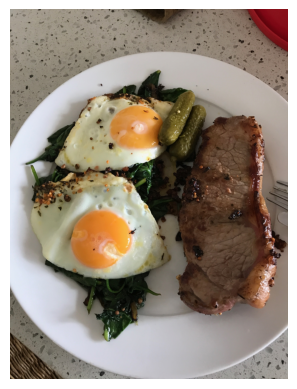

In [ ]:
plt.imshow(steak)
plt.axis(False)
plt.show()

In [ ]:
steak_norm = ImageDataGenerator(rescale = 1/255.)

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
def load_and_prep_image(filename, img_shape = 224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img_size = img_shape
  img = tf.image.resize(img, size= [img_size, img_shape])
  img = img/255.
  return img

(load_and_prep_image('03-steak.jpeg').shape)

TensorShape([224, 224, 3])

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale = 1/255. ,
                                             rotation_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             horizontal_flip = True)

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
print('Train data augmented:')
train_datagen_augmented = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                      target_size = (224,224),
                                                                      class_mode = 'binary',
                                                                      batch_size=32,
                                                                      shuffle = True)


Train data augmented:
Found 1500 images belonging to 2 classes.


In [ ]:
print('Augmented and Shuffled train data')
train_data_augmented_and_shuffled = train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                                target_size = (224,224),
                                                                                class_mode = 'binary')

Augmented and Shuffled train data


AttributeError: 'DirectoryIterator' object has no attribute 'flow_from_directory'

In [ ]:
model_8 = Sequential([
    Conv2D(filters=32, kernel_size=3, activation = 'relu', input_shape = (224, 224, 3)),
    Conv2D(32, 3, activation = 'relu'),
    MaxPool2D(2),
    Conv2D(32, 3, activation = 'relu'),
    Conv2D(32, 3, activation = 'relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_8.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)

history_8 = model_8.fit(train_data_augmented_and_shuffled,
                        epochs=5,
                        steps_per_epoch = len(train_data_augmented_and_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data))

NameError: name 'train_data_augmented_and_shuffled' is not defined

In [ ]:
steak = load_and_prep_image('03-steak.jpeg')
pred = model_4.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 260ms/step


In [ ]:
pred

array([[0.96137494]], dtype=float32)

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Next time try to preprocess image with image data generator
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

1/1 [==============================] - 0s 17ms/step


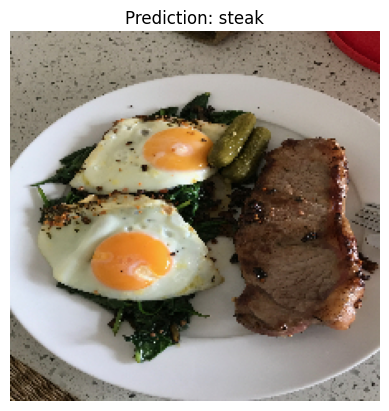

In [ ]:
pred_and_plot(model_4, '03-steak.jpeg')

In [ ]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pizza = mpimg.imread('03-pizza-dad.jpeg')

--2024-07-22 16:54:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2024-07-22 16:54:28 (242 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



1/1 [==============================] - 0s 18ms/step


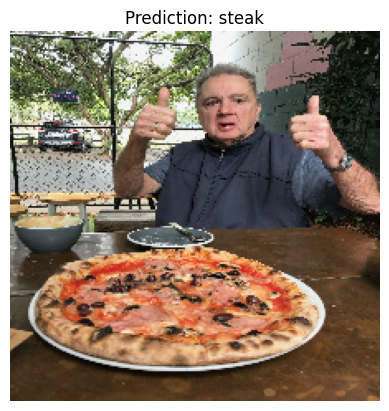

In [ ]:
pred_and_plot(model_4, '03-pizza-dad.jpeg')

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2024-07-22 17:18:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 172.253.118.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.7MB/s    in 23s     

2024-07-22 17:18:27 (21.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

ls: cannot access 'zip_ref': No such file or directory


In [ ]:
import os


for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/test.
There are 0 directories and 250 images in 10_food_classes_all_data/test/pizza.
There are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger.
There are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ramen.
There are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream.
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak.
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi.
There are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry.
There are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon.
There are 10 directories and 0 ima

In [ ]:
train_dir1 = '/content/10_food_classes_all_data/train'
test_dir1 = '/content/10_food_classes_all_data/test'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen1 = ImageDataGenerator(rescale = 1./255)
valid_datagen1 = ImageDataGenerator(rescale = 1./255)


train_data1 = train_datagen1.flow_from_directory(train_dir1,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode="categorical",
                                               seed = 42)

valid_data1 = valid_datagen.flow_from_directory(test_dir1,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode="categorical",
                                               seed = 42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 100,
                           kernel_size = 3,
                           activation = "relu",
                           kernel_initializer = "he_normal",
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(30,3,activation = "relu",kernel_initializer = "he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                       padding = "valid"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(30,3,activation = "relu",kernel_initializer = "he_normal"),
    tf.keras.layers.Conv2D(30,3,activation = "relu",kernel_initializer = "he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(), # we must flatten the 2D data because Dense will not accept it
    tf.keras.layers.Dense(10,activation = "softmax")

])
model_5.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0005),
              metrics = ["accuracy"])
model_5.fit(train_data1,
            epochs = 5,
            validation_data = valid_data1)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Epoch 1/5
235/235 [==============================] - 49s 198ms/step - loss: 3.0296 - accuracy: 0.2473 - val_loss: 2.5057 - val_accuracy: 0.2112
Epoch 2/5
235/235 [==============================] - 49s 207ms/step - loss: 1.8754 - accuracy: 0.4328 - val_loss: 2.7236 - val_accuracy: 0.2444
Epoch 3/5
235/235 [==============================] - 46s 196ms/step - loss: 1.1193 - accuracy: 0.6381 - val_loss: 2.5927 - val_accuracy: 0.3012
Epoch 4/5
235/235 [==============================] - 46s 197ms/step - loss: 0.6055 - accuracy: 0.8081 - val_loss: 2.4736 - val_accuracy: 0.3368
Epoch 5/5
235/235 [==============================] - 46s 194ms/step - loss: 0.2865 - accuracy: 0.9265 - val_loss: 2.6149 - val_accuracy: 0.3644
